# Convolutional Neural Network

### Importing the libraries

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator # Image Augmentation
# Image Augmentation is a technique used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

In [6]:
tf.__version__

'2.13.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,       # normalize pixel values to [0,1]
    shear_range=0.2,      # randomly applies shearing transformation
    zoom_range=0.2,       # randomly applies zoom
    horizontal_flip=True  # randomly flip the images horizontally
)

training_set = train_datagen.flow_from_directory(
    'dataset/training_set',       # relative path from working directory to training set
    target_size=(64, 64),         # all images will be resized to 64x64
    batch_size=32,                # number of images to be yielded from generator per batch
    class_mode='binary'           # type of label arrays that are returned (binary because there are only two classes, cat or dog)
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255) # rescale pixel values between 0 and 1 (loading the test images only needs to normalize the pixel values)
test_set = test_datagen.flow_from_directory(
    'dataset/test_set', 
    target_size=(64, 64), 
    batch_size=32, 
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [18]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [19]:
cnn.add(tf.keras.layers.Conv2D(
  filters=32,             # number of kernels (square matrix with variable values)
  kernel_size=3,          # size of the kernel (3x3 matrix)
  activation='relu',      # activation function (max(0, x))
  input_shape=(64, 64, 3) # input shape (64x64 RGB image)
))

### Step 2 - Pooling

In [20]:
cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=2,      # uses a pooling window of 2x2
    strides=2         # strides of 2 (shifts the pooling window by 2 pixel units)
))

### Adding a second convolutional layer

In [21]:
cnn.add(tf.keras.layers.Conv2D(
  filters=32,             # number of kernels (square matrix with variable values)
  kernel_size=3,          # size of the kernel (3x3 matrix)
  activation='relu',      # activation function (max(0, x))
))

cnn.add(tf.keras.layers.MaxPool2D(
    pool_size=2,      # uses a pooling window of 2x2
    strides=2         # strides of 2 (shifts the pooling window by 2 pixel units)
))

### Step 3 - Flattening

In [22]:
cnn.add(tf.keras.layers.Flatten()) 
# transforms 2D matrix into a vector so that we can feed it into a fully connected layer

### Step 4 - Full Connection

In [23]:
cnn.add(tf.keras.layers.Dense(128, activation='relu'))

### Step 5 - Output Layer

In [24]:
cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [25]:
cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Training the CNN on the Training set and evaluating it on the Test set

In [26]:
cnn.fit(
  x = training_set, 
  validation_data=test_set,
  epochs=25,
)

Epoch 1/25
  1/250 [..............................] - ETA: 6:06 - loss: 0.6820 - accuracy: 0.5312

2023-08-02 11:06:44.655643: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28096128 exceeds 10% of free system memory.
2023-08-02 11:06:44.843125: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28096128 exceeds 10% of free system memory.


  3/250 [..............................] - ETA: 46s - loss: 0.7023 - accuracy: 0.5521

2023-08-02 11:06:45.041430: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28096128 exceeds 10% of free system memory.
2023-08-02 11:06:45.211649: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28096128 exceeds 10% of free system memory.


  5/250 [..............................] - ETA: 40s - loss: 0.6986 - accuracy: 0.5437

2023-08-02 11:06:45.350847: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28096128 exceeds 10% of free system memory.


250/250 [==============================] - 38s 149ms/step - loss: 0.6432 - accuracy: 0.6225 - val_loss: 0.5776 - val_accuracy: 0.6985
Epoch 2/25
250/250 [==============================] - 46s 183ms/step - loss: 0.5724 - accuracy: 0.7024 - val_loss: 0.5321 - val_accuracy: 0.7340
Epoch 3/25
250/250 [==============================] - 73s 291ms/step - loss: 0.5396 - accuracy: 0.7271 - val_loss: 0.5213 - val_accuracy: 0.7350
Epoch 4/25
250/250 [==============================] - 70s 281ms/step - loss: 0.5010 - accuracy: 0.7556 - val_loss: 0.4894 - val_accuracy: 0.7695
Epoch 5/25
250/250 [==============================] - 60s 241ms/step - loss: 0.4814 - accuracy: 0.7636 - val_loss: 0.4680 - val_accuracy: 0.7810
Epoch 6/25
250/250 [==============================] - 58s 231ms/step - loss: 0.4529 - accuracy: 0.7840 - val_loss: 0.4718 - val_accuracy: 0.7820
Epoch 7/25
250/250 [==============================] - 54s 215ms/step - loss: 0.4434 - accuracy: 0.7945 - val_loss: 0.4936 - val_accuracy: 0.7

### (Optional) Saving the model

In [27]:
cnn.save('trained/dogcat.keras')

## Part 4 - Making a single prediction

### (Optional) Load a trained model

In [4]:
cnn = tf.keras.models.load_model('trained/dogcat.keras')

### Making a prediction

1/1 [==============================] - 0s 27ms/step


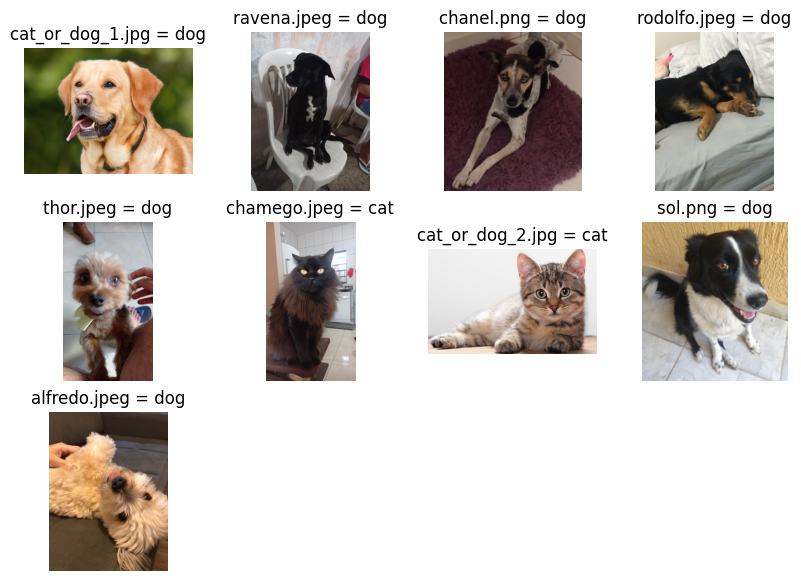

In [28]:
import numpy as np
import os
from keras.preprocessing import image
from matplotlib import pyplot as plt
from matplotlib.image import imread

dir_path = "dataset/single_prediction/"
test_images = []
plot_images= []

fig = plt.figure(figsize=(10, 7))

for file_name in os.listdir(dir_path):
    file_path = os.path.join(dir_path, file_name)
    if os.path.isfile(file_path):

        test_image = image.load_img(
            file_path,
            target_size=(64, 64)
        )

        test_image = image.img_to_array(test_image) 
        test_images.append(test_image)
        plot_images.append((imread(file_path), file_name))


    
test_images = [ti/255.0 for ti in test_images]

test_images = np.array(test_images)
result = cnn.predict(test_images)

predictions = ['dog' if rs > 0.5 else 'cat' for rs in result]

cols = 4
rows = int(np.ceil(len(plot_images) / 4))

for i, (img, file_name) in enumerate(plot_images):
    fig.add_subplot(rows, cols, i+1)
    plt.title(file_name + " = " + predictions[i])
    plt.imshow(img)
    plt.axis('off')

plt.show()